# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

**COMPLETE THE TASKS IN BOLD BELOW:**

**TASK: Run the following cells to import the data and view the DataFrame.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('inp_files/wholesome-customers-data.csv')

In [3]:
df.head() # pirkėjų duomenys
# kiek išleidžia pirkiniams

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

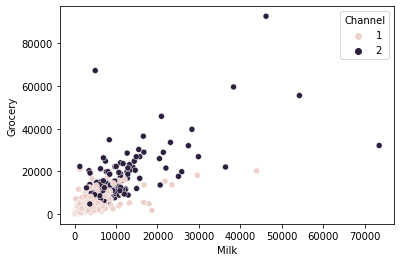

In [6]:
sns.scatterplot(data=df,x='Milk', y='Grocery', hue='Channel')
plt.show()
# matome, antro kanalo naudotojai daugiau išleidžia ant pieno ir pirkinių negu pirmo kanalo
# labiau tikėtina, kad antram kanalui priklausantys pirkėjai daugiau išleis.

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

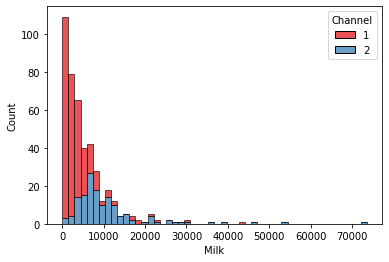

In [14]:
# Set1 - duoda ryškias, atskiras spalvas
# multiple=stack padaro, kad viena ant kitos būtų uždėta, taip aiškiau palygint kanalų pasiskirstymą
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1',multiple='stack')
plt.show()
# matome, žmonių skaičių, kiek pirko pieną, skirtinguose kanaluose (y - aškis)
# x ašyje matome, kad nors antram kanale mažiau žmonių, bet kiek išleidžia ant pieno yra daugiau
# virš 50000 ir 7000 pinigų pienui, tik mėlini pirkėjai.

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

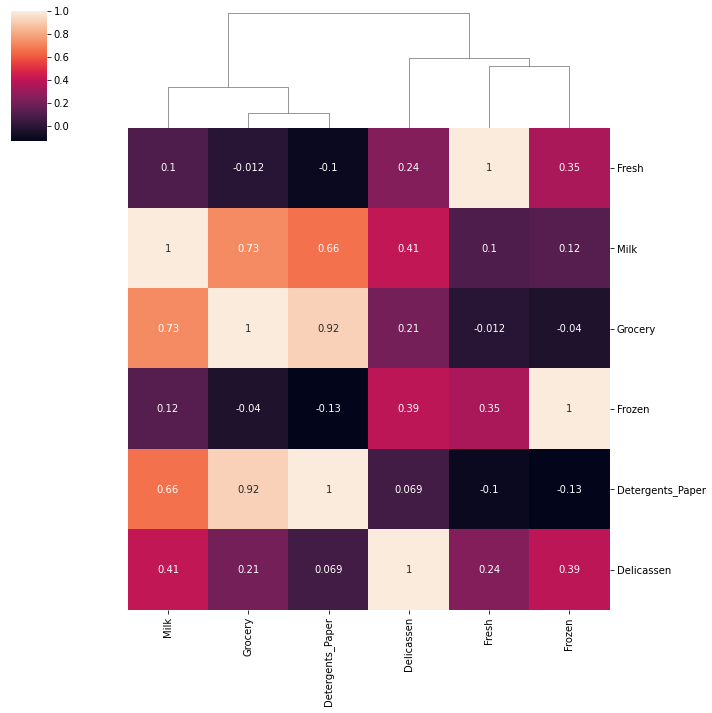

In [16]:
sns.clustermap(data=df.drop(['Channel','Region'],axis=1).corr(),annot=True,row_cluster=False)
plt.show()
# kad nesidubliuotu info nuėmam, vieną istrižainės pusę su row_cluster=False 
# nes corr lentelė yra tie patys stulpeliai ant tų pačių stulpelių
# matom, kad pienas ir grocery koreliuoja stipriausiai t.y. 0.73

**TASK: Create a PairPlot of the dataframe, colored by Region.**

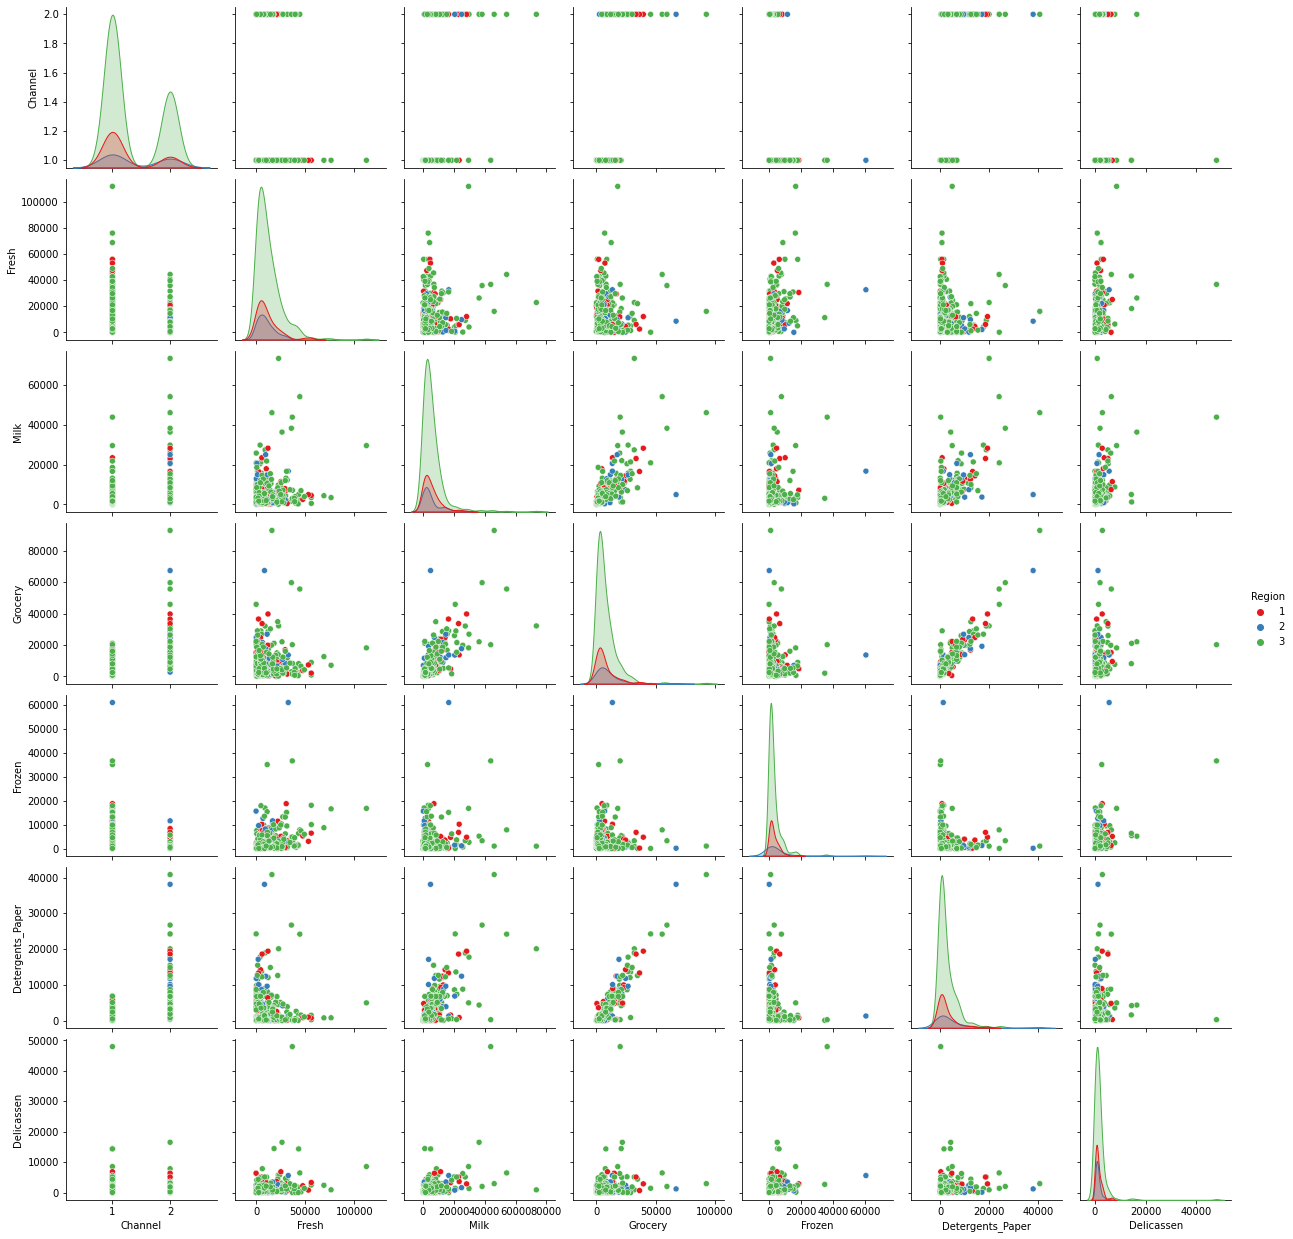

In [17]:
sns.pairplot(df,hue='Region',palette='Set1')
plt.show()
# delikateso stulpelyje, matosi, kad mažiausiai išleidžia žmonės, nors yra išskirčių
# daugumai kategorijų, jeigu vienoje daugiau išleidi, tai ir kitoje.
# pagal regioną nesimato kažkokio ryškaus skirtumo tarp pirkimo kategorijų
# jeigu pakeistume hue iš Region į Channel, tada matosi, kaip pvz pirmasis scatterplot viršuje
# kur tarp pirmo ir antro kanalų yra ryškus skirtumas, kad antro kanalo pirkėjai daugiau išleidžia.
# Taigi, kanalas panašu, kad yra svarbus rodiklis kiek kas išleidžia.

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# kadangi region ir channel yra kitokio mato negu likę stulpeliai ir kadangi epsilon yra atstumo matas
# gera mintis scalint į vieną skalę duomenis.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
outlier_percent = []
double_data_dim = scaled_df.shape[1] * 2

for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps,min_samples=double_data_dim)
    dbscan.fit(scaled_df)
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

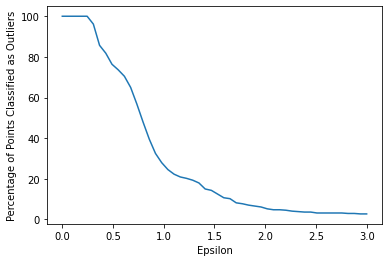

In [22]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon')
plt.show()
# iš vizualizacijų matėm, kad kažkiek išskirčių turi būti, ir negali viskas būt išskirtis tai ieškom to viduriuko
# Būtų gerai pasikonsultuoti su duomenų ekpertu ir paklausti kiek išskirčių reitkų tikėtis
# Arba galim iš šio grafiko padaryti educated guess. Sakoma, kad dbscan padeda apsispręsti, nes juo rememes. 
# Norisi surasti tą vietą, kur kreivė pradeda mažai keistis (suplokštėja, reikšmės mažai keičiasi)
# matosi, kad maždaug nuo epsilon=2, kad kreivė suplokštėja ir nesikeičia.

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [23]:
dbscan = DBSCAN(eps=2,min_samples=double_data_dim)
dbscan.fit(scaled_df)

DBSCAN(eps=2, min_samples=16)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

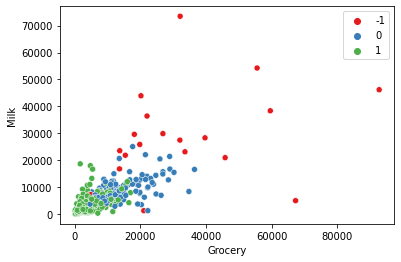

In [26]:
# galima hue paduod iš atskiro masyvo, nes index sutampa su df index
sns.scatterplot(data=df,x='Grocery', y='Milk', hue=dbscan.labels_, palette='Set1')
plt.show()
# kas įdomu, kad dbscan kai kuriuos taškus kurie yra arti klasterių laiko kaip išskirtis. Kodėl?
# dbscan atsižvelgia į visus bruožus, o mes vizualiai galim tik į kelis vienu metu, pvz čia milk ir grocery
# nubrėžus kities bruožams scatterplot matosi tas pats. Žr. apačioj

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

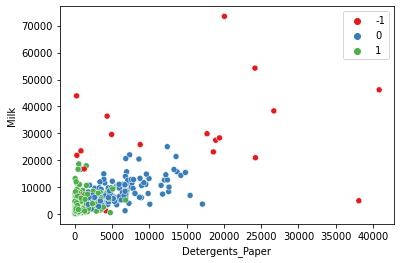

In [27]:
sns.scatterplot(data=df,x='Detergents_Paper', y='Milk', hue=dbscan.labels_, palette='Set1')
plt.show()
# ta pati situacija, dbscan randa išskirtis, kur negalvotum, kad išskirtis. Pvz matosi paslėptas raudonas taškas
# ties 5000 detergent_papaer. Taip yra nes, tas taškas/pirkėjas išleidžia daug pinigų 
# kažkurioje kitoje kategorijoje, kur iš 2D scatterplot nesimato. Todėl toliau pažiūrim į pačius skaičius
# kad geriau suprast kas čia vyksta.

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [28]:
df['Labels'] = dbscan.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [32]:
category_means = df.drop(['Region', 'Channel'],axis=1).groupby('Labels').mean()
category_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


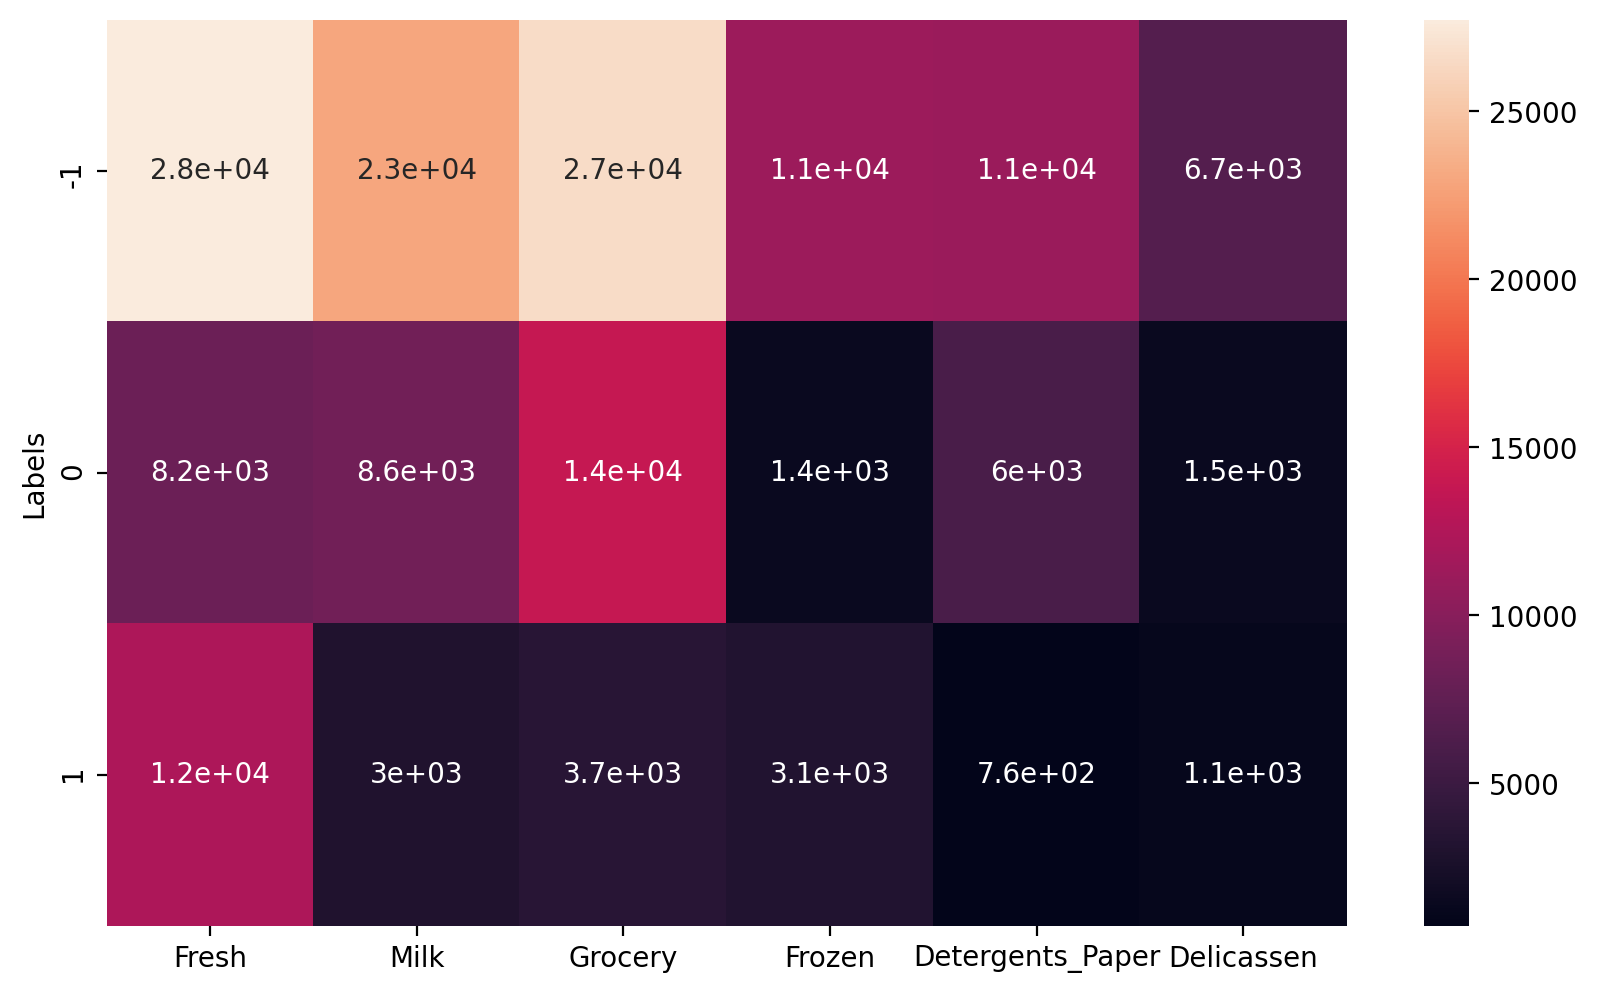

In [34]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(category_means,annot=True)
plt.show()
# matome, kad šviesesnės spalvos reiškia daugiau išleido.
# 3 kategorijos - fresh,milk,groceries labiausiai parodo, kas yra išskirtis
# nes juose yra pirkėjų kur labai daug išleidžia
# išskirčių eilutėje matosi vienu order of magnitute daugiau spending 
# t.y. ten keliama 4 laipsniu, o klasteriuose keliama 3 laipsniu ir ten šviesensės spalvos visuose stulpeliuose

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
scaled_means = scaler.fit_transform(category_means)
scaled_means

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.28040821, 0.44455106, 0.        , 0.5000874 ,
        0.07374055],
       [0.2101965 , 0.        , 0.        , 0.1664745 , 0.        ,
        0.        ]])

In [39]:
scaled_means_df = pd.DataFrame(scaled_means,columns=category_means.columns,index=category_means.index)
scaled_means_df
# matome, kad išskirtys yra daugiausiai išlaidaujantys pirkėjai visuose kategorijose
# ir matosi 0 ir 1 klasterio palyginmai, kuriuose kategorijose kur daugiau išleidžia

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


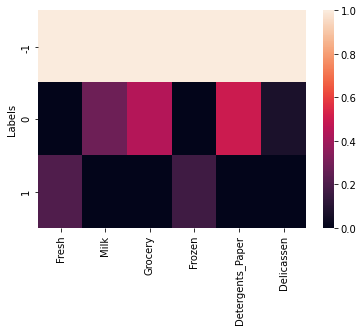

In [40]:
sns.heatmap(scaled_means_df)
plt.show()
# tą pati matom, tik vizualiai naudojant spalvas

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

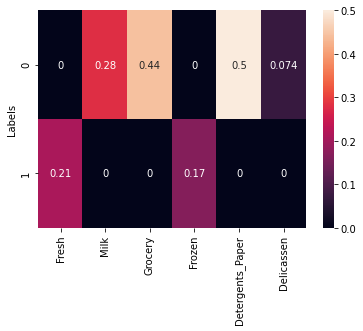

In [44]:
# dar buvo galima paduot scaled_means_df.loc[[0.1]]
sns.heatmap(scaled_means_df.drop(-1,axis=0),annot=True)
plt.show()

**TASK: What spending category were the two clusters most different in?**

In [126]:
# Detergents_Paper ir Milk, bet realiai visose ganėtinai skirtingi